# **Data Analysis Project on Zomato using Python**

## Create a project for a Zomato data using python and that laibreries:-
- First of all import all necessary laibreries.
- Now import our data from other sources.
- Read data carefully.
- Read all information related to your data (like :- size,column,info,shape,head,tail...............)
- fainally Anylyse your data using different laibreries according to the need of data.

### Import all necessary laibreries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import our data from Excel file :-

In [2]:
df = pd.read_excel("Zomato data .xlsx")

### All information about our data (EDA) :-

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.shape

(148, 7)

##  Change the data type of Rate column Properly .

In [5]:
def new_rate(value):
    value=str(value).split("/")
    value=value[0];
    return float(value)

df["rate"]=df["rate"].apply(new_rate)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [8]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [9]:
df.isnull().sum()   ## Cheak null value.

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# 1. What type of restaurant do the majority of customers order from?

In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
df["listed_in(type)"].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

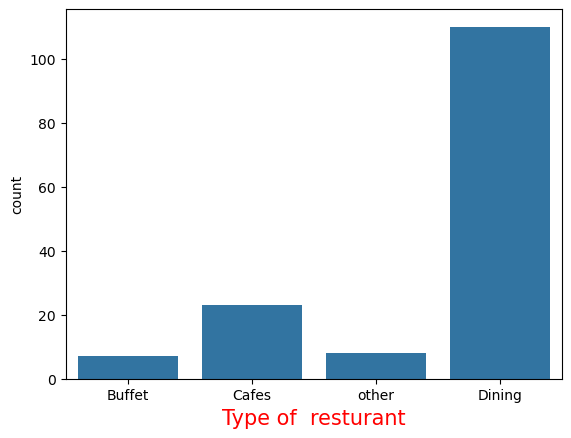

In [12]:
sns.countplot(x = "listed_in(type)" , data = df)
plt.xlabel("Type of  resturant" , fontsize = 15 , color = "r")
plt.show()

## Result :- Maximum number of  custamer like dining types of rasturant .

# 2. No of votes for each resturant received from customers :-

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [14]:
new_data = df.groupby("listed_in(type)")["votes"].sum()
new_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

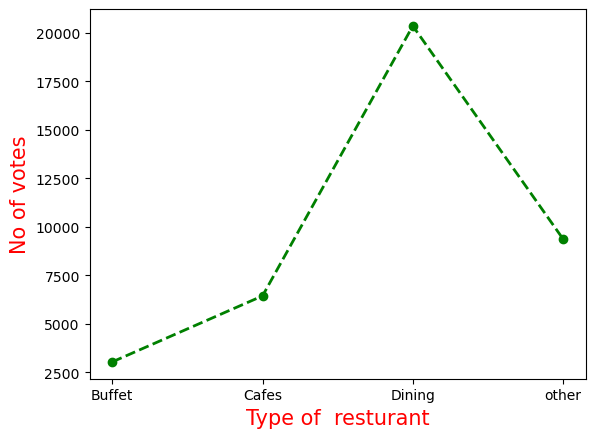

In [15]:
new_data = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": new_data})
plt.plot(result , color = "g" , linewidth = 2 , marker = "o" , linestyle = "--")
plt.xlabel("Type of  resturant" , fontsize = 15 , color = "r")
plt.ylabel("No of votes" , fontsize = 15 , color = "r")
plt.show()

## Result :- Maximum vote receivd Dining type of resturant by each custamer.

# 3. Received maximum rateing :-

In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [17]:
df["rate"].value_counts()

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

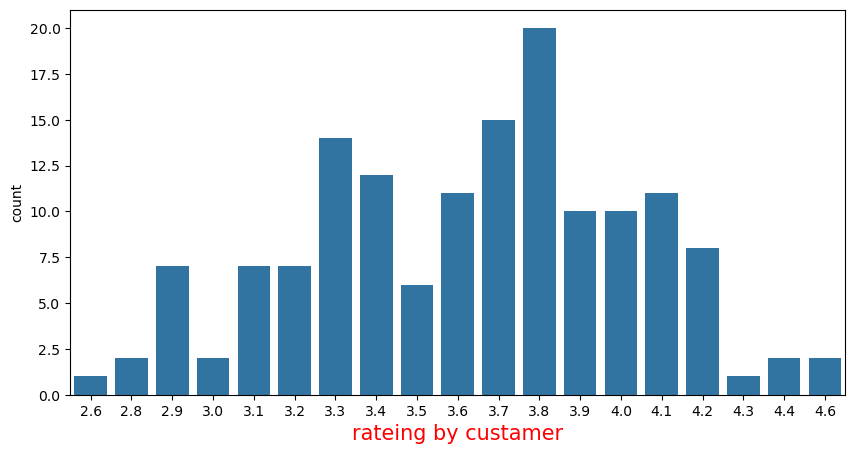

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(x="rate" , data = df)
plt.xlabel("rateing by custamer" , fontsize = 15 , color = "r")
plt.show()

## Result :- Maximum Rateing receivd 3.8 by each custamer.

# What are the ratings that the majority of restaurants have received?

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


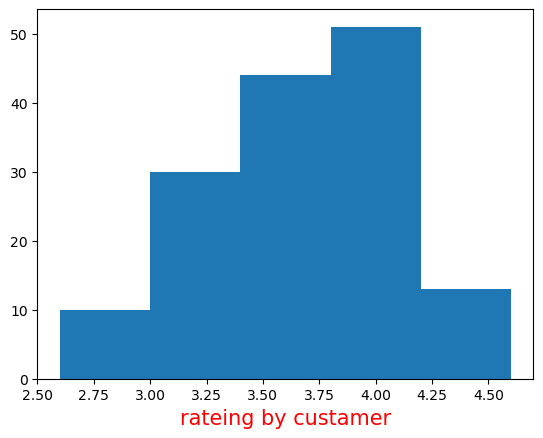

In [20]:
plt.hist(df["rate"] ,bins = 5)
plt.xlabel("rateing by custamer" , fontsize = 15 , color = "r")
plt.show()

## Result :- Maximum Rateing receivd 3.5 to 4.2 to by each custamer.

# 4. Average order spending by couple :-

In [21]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [22]:
df["approx_cost(for two people)"].value_counts()

approx_cost(for two people)
300    23
200    16
150    16
400    15
500    14
600    13
800    12
100     6
450     6
250     6
700     5
550     3
750     3
350     3
900     2
850     2
650     2
950     1
Name: count, dtype: int64

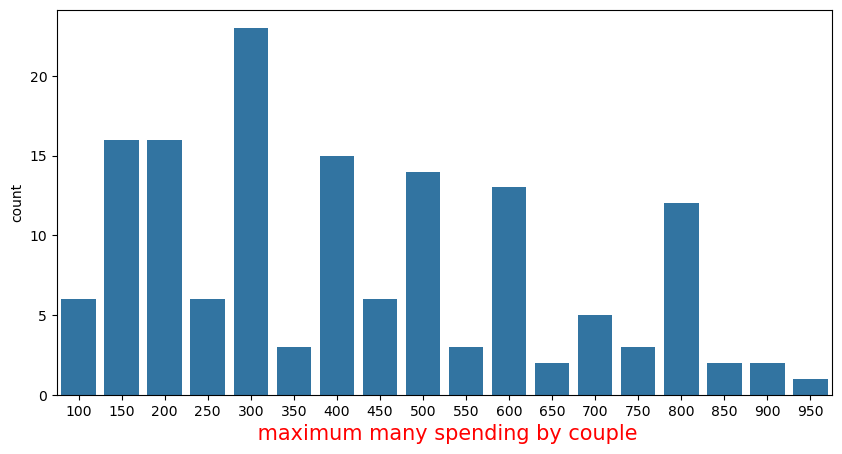

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(x="approx_cost(for two people)" , data = df)
plt.xlabel(" maximum many spending by couple" , fontsize = 15 , color = "r")
plt.show()

## Result :- maximum many spending by couple are 300rs .

# 5. Which mode received maximum rateing .

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


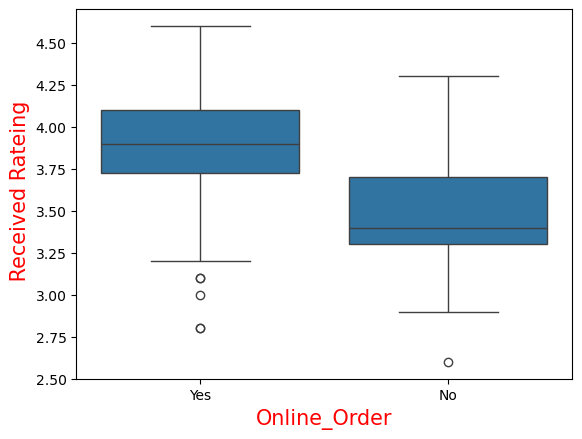

In [25]:
sns.boxplot(x="online_order" , y="rate" , data = df)
plt.xlabel("Online_Order" , fontsize = 15 , color = "r")
plt.ylabel(" Received Rateing" , fontsize = 15 , color = "r")
plt.show()

## Result :- Maximum Rateing receivd 3.75 to 4.2 by online mode each custamer. and Offline orders received lower ratings in comparison to online order

In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


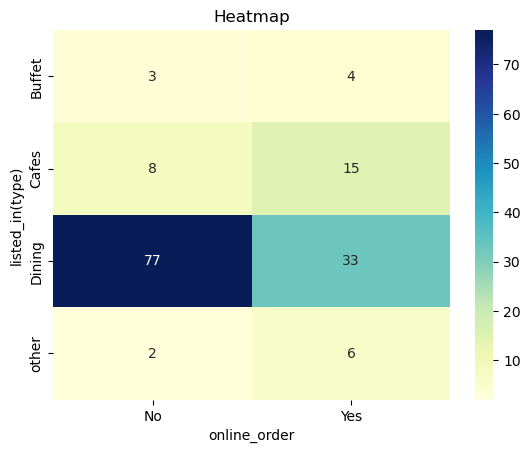

In [27]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu",fmt='d')
plt.title('Heatmap')
plt.xlabel('online_order')
plt.ylabel('listed_in(type)')
plt.show()

#### **Conclusion : Dining restaurants primarily accept offline orders, whereas cafes primarily recieve online orders. This suggests that clients prefer orders in person at restaurants,but prefer online ordering at cafes.**

**Thank you**